<a href="https://colab.research.google.com/github/AthaSSiN/FashionMNIST_CNN_TF/blob/master/TF_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
from tensorflow import keras

from keras import models, regularizers

import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_test = x_test/255.0
x_train = x_train/255.0
x_train = x_train.reshape((x_train.shape[0], 28,28,1))
x_test = x_test.reshape((x_test.shape[0], 28,28,1))


In [0]:
device_name = tf.test.gpu_device_name()

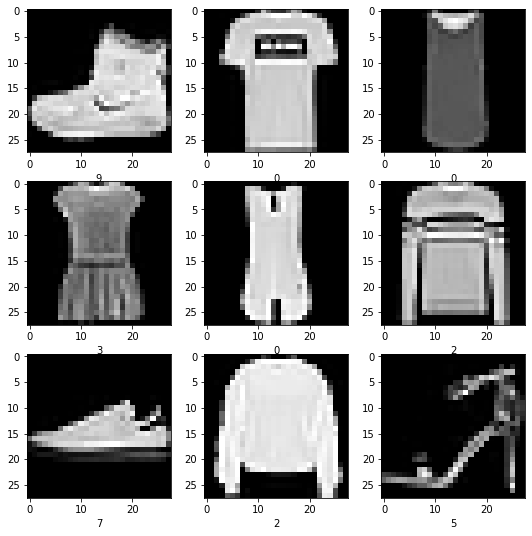

In [14]:
plt.figure(figsize=(9,9))
for i in range(9):
  plt.subplot(331 + i)
  plt.imshow(x_train[i,:,:,0], cmap = plt.get_cmap('gray'))
  plt.xlabel(y_train[i])
plt.show()

In [0]:
model = keras.Sequential()

In [0]:
model.add(keras.layers.Conv2D(input_shape = (28, 28, 1), \
                              filters = 32, kernel_size = (5,5), \
                              activation = 'relu',  \
                              data_format = 'channels_last', \
                              kernel_initializer = 'he_uniform'))
model.add(keras.layers.MaxPool2D(pool_size= (2,2)))
model.add(keras.layers.Conv2D(filters = 10, kernel_size = (3,3), activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu', kernel_initializer = 'he_uniform'))
model.add(keras.layers.Dense(10, activation = 'softmax', kernel_initializer = 'he_uniform'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 10)        2890      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [18]:
with tf.device(device_name):
  model.compile(optimizer= 'adam', 
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
 
  history = model.fit(
    x_train, y_train ,
    epochs=15, 
    validation_data=(x_test, y_test)
   )

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 39s 655us/sample - loss: 1.7185 - accuracy: 0.7453 - val_loss: 1.6791 - val_accuracy: 0.7821
Epoch 2/15
60000/60000 [==============================] - 39s 645us/sample - loss: 1.6632 - accuracy: 0.7983 - val_loss: 1.6831 - val_accuracy: 0.7772
Epoch 3/15
60000/60000 [==============================] - 39s 651us/sample - loss: 1.6526 - accuracy: 0.8081 - val_loss: 1.6584 - val_accuracy: 0.8026
Epoch 4/15
60000/60000 [==============================] - 39s 647us/sample - loss: 1.6456 - accuracy: 0.8156 - val_loss: 1.6501 - val_accuracy: 0.8108
Epoch 5/15
60000/60000 [==============================] - 39s 646us/sample - loss: 1.6410 - accuracy: 0.8199 - val_loss: 1.6453 - val_accuracy: 0.8165
Epoch 6/15
60000/60000 [==============================] - 39s 652us/sample - loss: 1.6382 - accuracy: 0.8227 - val_loss: 1.6479 - val_accuracy: 0.8125
Epoch 7/15
60000/60000 [====================

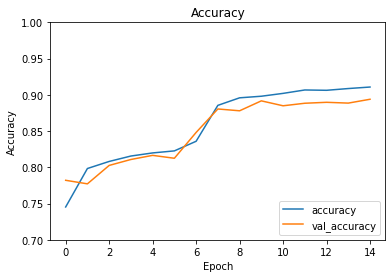

In [19]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')

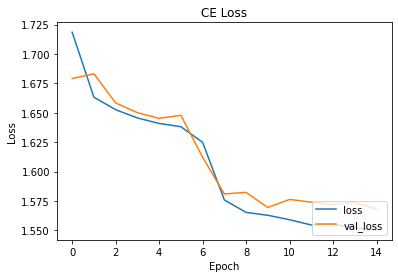

In [20]:
plt.title("CE Loss")
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')